## 1. Import required packages

In [1]:

# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from numpy import arange

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.kernel_ridge import KernelRidge

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn-v0_8') # a style that can be used for plots - see style reference above
print(plt.style.available)

# trick to widen the screen
from IPython.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 2. Import  the dataset DF_AH.csv and  Exploratory Data Analysis(15 points)
* The dataset DF_AH.csv is exported from the data data preprocessing notebook after we removed the outliars, and doing some feature engineering. This dataset contains 92 variables including the target variable.
* Do the exploratory data analysis to gain better insights on the data

In [2]:
df_AH = pd.read_csv("Dataset/DF_AH.csv")

df_AH.info()
#hello

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual  

## 3. Perform additional Feature Engineering(10 points)

1) Identify the unique number of foundation types

In [3]:
print(df_AH['Foundation'].unique())
print(len(df_AH['Foundation'].unique()))

['CBlock' 'PConc' 'Wood' 'BrkTil' 'Slab' 'Stone']
6


2) Create the dummy variable for the foundation type

In [4]:
foundation_dummies = pd.get_dummies(df_AH['Foundation'], prefix='Foundation_')
pd.concat([df_AH, foundation_dummies], axis=1)
df_AH = df_AH.drop('Foundation', axis=1)
df_AH.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


3) Identify the all the unique neighbourhood

In [5]:
print(df_AH['Neighborhood'].unique())
print(len(df_AH['Neighborhood'].unique()))

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
28



4) Create the dummy variable for the neighbourhood

In [6]:
#Riccardo
neighborhood_dummies = pd.get_dummies(df_AH['Neighborhood'], prefix='Neighborhood_')
pd.concat([df_AH, neighborhood_dummies], axis=1)
df_AH = df_AH.drop('Neighborhood', axis=1)
df_AH.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


5) Look at the DF_AH.info() and drop all the variables that have Non-Null count less than 2500.

In [7]:
#Riccardo
df_AH = df_AH.loc[:, df_AH.count() >= 2500]
df_AH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

## 4.  Impute the data (10 points)

1) Check whether each of the variables have missing values


In [8]:
#Riccardo
df_AH.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Bsmt Qual           79
Bsmt Cond           79
Bsmt Exposure       82
BsmtFin Type 1      79
BsmtFin SF 1         0
BsmtFin Type 2      80
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full B

1746


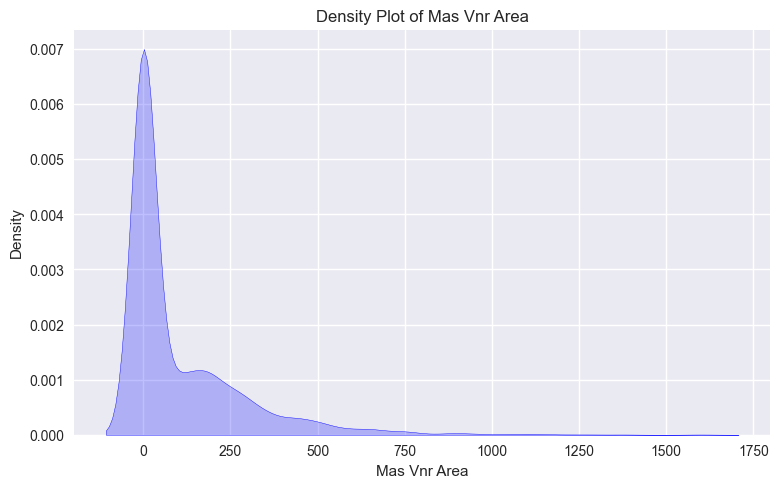

In [9]:
# why is Mas Vnr Area null?

# this shows that null is not meant to represent 0, since MsVnrArea has several values that are 0. 
# This implies that Mas Vnr Area is null by mistake
isMsVnrZero = df_AH[df_AH['Mas Vnr Area'] == 0]
print(len(isMsVnrZero)) 

# since null doesn't signify 0, we do a describe to see which imputation method would be best
df_AH['Mas Vnr Area'].describe()

# this shows that it is massively right skewed, so median is a better choice of imputation than average
plt.figure(figsize=(8,5))
sns.kdeplot(df_AH["Mas Vnr Area"].dropna(), color='blue', fill=True)

plt.xlabel("Mas Vnr Area")
plt.ylabel("Density")
plt.title("Density Plot of Mas Vnr Area")
plt.show()

In [10]:
# investigate into why electrical is null
electricNull = df_AH[df_AH['Electrical'].isnull()]
electricNull.head()

print(df_AH['Electrical'].unique())

['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan 'Mix']


In [11]:
# investigate into why Bsmt Full/Half Bath are null
bsmtFullNull = df_AH[df_AH['Bsmt Full Bath'].isnull()] 
bsmtHalfNull = df_AH[df_AH['Bsmt Half Bath'].isnull()] 
bsmtFullNull.head()
bsmtHalfNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
1496,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,No,0,7,2008,WD,Normal,284700,3820.0,3820,372,NaN,0,1,1,0,1,0,1


In [12]:
# investigation into why TotalBathrooms is null
totalBathNull = df_AH[df_AH['TotalBathrooms'].isnull()]
totalBathNull.head()
# this ^ shows that it seems like the data just was corrupted, however it seems that it can be easily filled
# by adding the half bath number and full bath number

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
1496,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,No,0,7,2008,WD,Normal,284700,3820.0,3820,372,NaN,0,1,1,0,1,0,1


In [13]:
# investigation into why basement values are null

# since all of these values are categorical and lack a "No basement" equivalent field,
# that's probably what null is supposed to mean
print(df_AH['Bsmt Qual'].unique())
print(df_AH['Bsmt Cond'].unique())
print(df_AH['Bsmt Exposure'].unique())
print(df_AH['BsmtFin Type 1'].unique())
print(df_AH['BsmtFin Type 2'].unique())

['TA' 'Gd' 'Ex' nan 'Fa' 'Po']
['Gd' 'TA' nan 'Po' 'Fa' 'Ex']
['Gd' 'No' 'Mn' 'Av' nan]
['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' nan]
['Unf' 'LwQ' 'BLQ' 'Rec' nan 'GLQ' 'ALQ']


In [14]:
# investigation into why garage values are null

# here we can see that these also lack a "No garage" value like the basements. 
print(df_AH['Garage Type'].unique())
print(df_AH['Garage Finish'].unique())
print(df_AH['Garage Cars'].unique())
print(df_AH['Garage Qual'].unique())
print(df_AH['Garage Cond'].unique())


# an exception is the garage cars and garage area fields, which both only have 1 null value.
# this would imply that they are null by mistake

['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan 'CarPort' '2Types']
['Fin' 'Unf' 'RFn' nan]
[ 2.  1.  3.  0.  4.  5. nan]
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


In [15]:
# this shows that all of the data for this row seems to be corrupted
garageCarNull = df_AH[df_AH['Garage Cars'].isnull()]
garageCarNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
2231,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,MnPrv,0,3,2007,WD,Alloca,150909,2687.0,1828,212,2.0,1,0,1,0,1,0,1


In [16]:
# this is the same row as the garage car corruption
garageAreaNull = df_AH[df_AH['Garage Area'].isnull()]
garageCarNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
2231,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,MnPrv,0,3,2007,WD,Alloca,150909,2687.0,1828,212,2.0,1,0,1,0,1,0,1


2) Impute the missing values using appropriate method and explain why you use that method?

In [17]:
# delete the corrupted line since there's only one line that has been corrupted
df_AH = df_AH[df_AH['PID'] != 910201180]

In [18]:
# For all of the categorical data missing a not applicable field, a value of "NA" is added instead of null
df_AH['Bsmt Qual'].fillna("NA", inplace=True)
df_AH['Bsmt Cond'].fillna("NA", inplace=True)
df_AH['Bsmt Exposure'].fillna("NA", inplace=True)
df_AH['BsmtFin Type 1'].fillna("NA", inplace=True)
df_AH['BsmtFin Type 2'].fillna("NA", inplace=True)
df_AH['Garage Type'].fillna("NA", inplace=True)
df_AH['Garage Finish'].fillna("NA", inplace=True)
df_AH['Garage Qual'].fillna("NA", inplace=True)
df_AH['Garage Cond'].fillna("NA", inplace=True)

In [19]:
# inpute 0 for GarageYrBuilt to signify that there is no garage
df_AH['Garage Yr Blt'].fillna(0, inplace=True)

In [20]:
# for Mas Vnr Area, do median as imputation since it is massively right skewed
msVnrAreaMedian = df_AH['Mas Vnr Area'].median()
df_AH['Mas Vnr Area'].fillna(msVnrAreaMedian, inplace=True)

In [21]:
# for electrical, Bsmt Full Bath, and Bsmt Half Bath delete rows since they are an insignificant
# amount of the data that seems to be corrupted
cols_to_drop = ['Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_AH = df_AH.dropna(subset=cols_to_drop)

In [22]:
# for total bath, fill in missing value with 4: 3 Full bathrooms, 1 Half bathroom
df_AH['TotalBathrooms'].fillna(4, inplace=True)

In [23]:
df_AH.isnull().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr

3) Look at the data and for remaining categorical variable, create the dummy variable, or drop the variable. Explain your reasoning.

In [24]:
def create_dummies(df, col):
    dummies = pd.get_dummies(df[col], prefix=(col + "_"))
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
    return df
    

In [25]:
object_columns = df_AH.select_dtypes(include=['object']).columns
for obj in object_columns:
    df_AH = create_dummies(df_AH, obj)

42


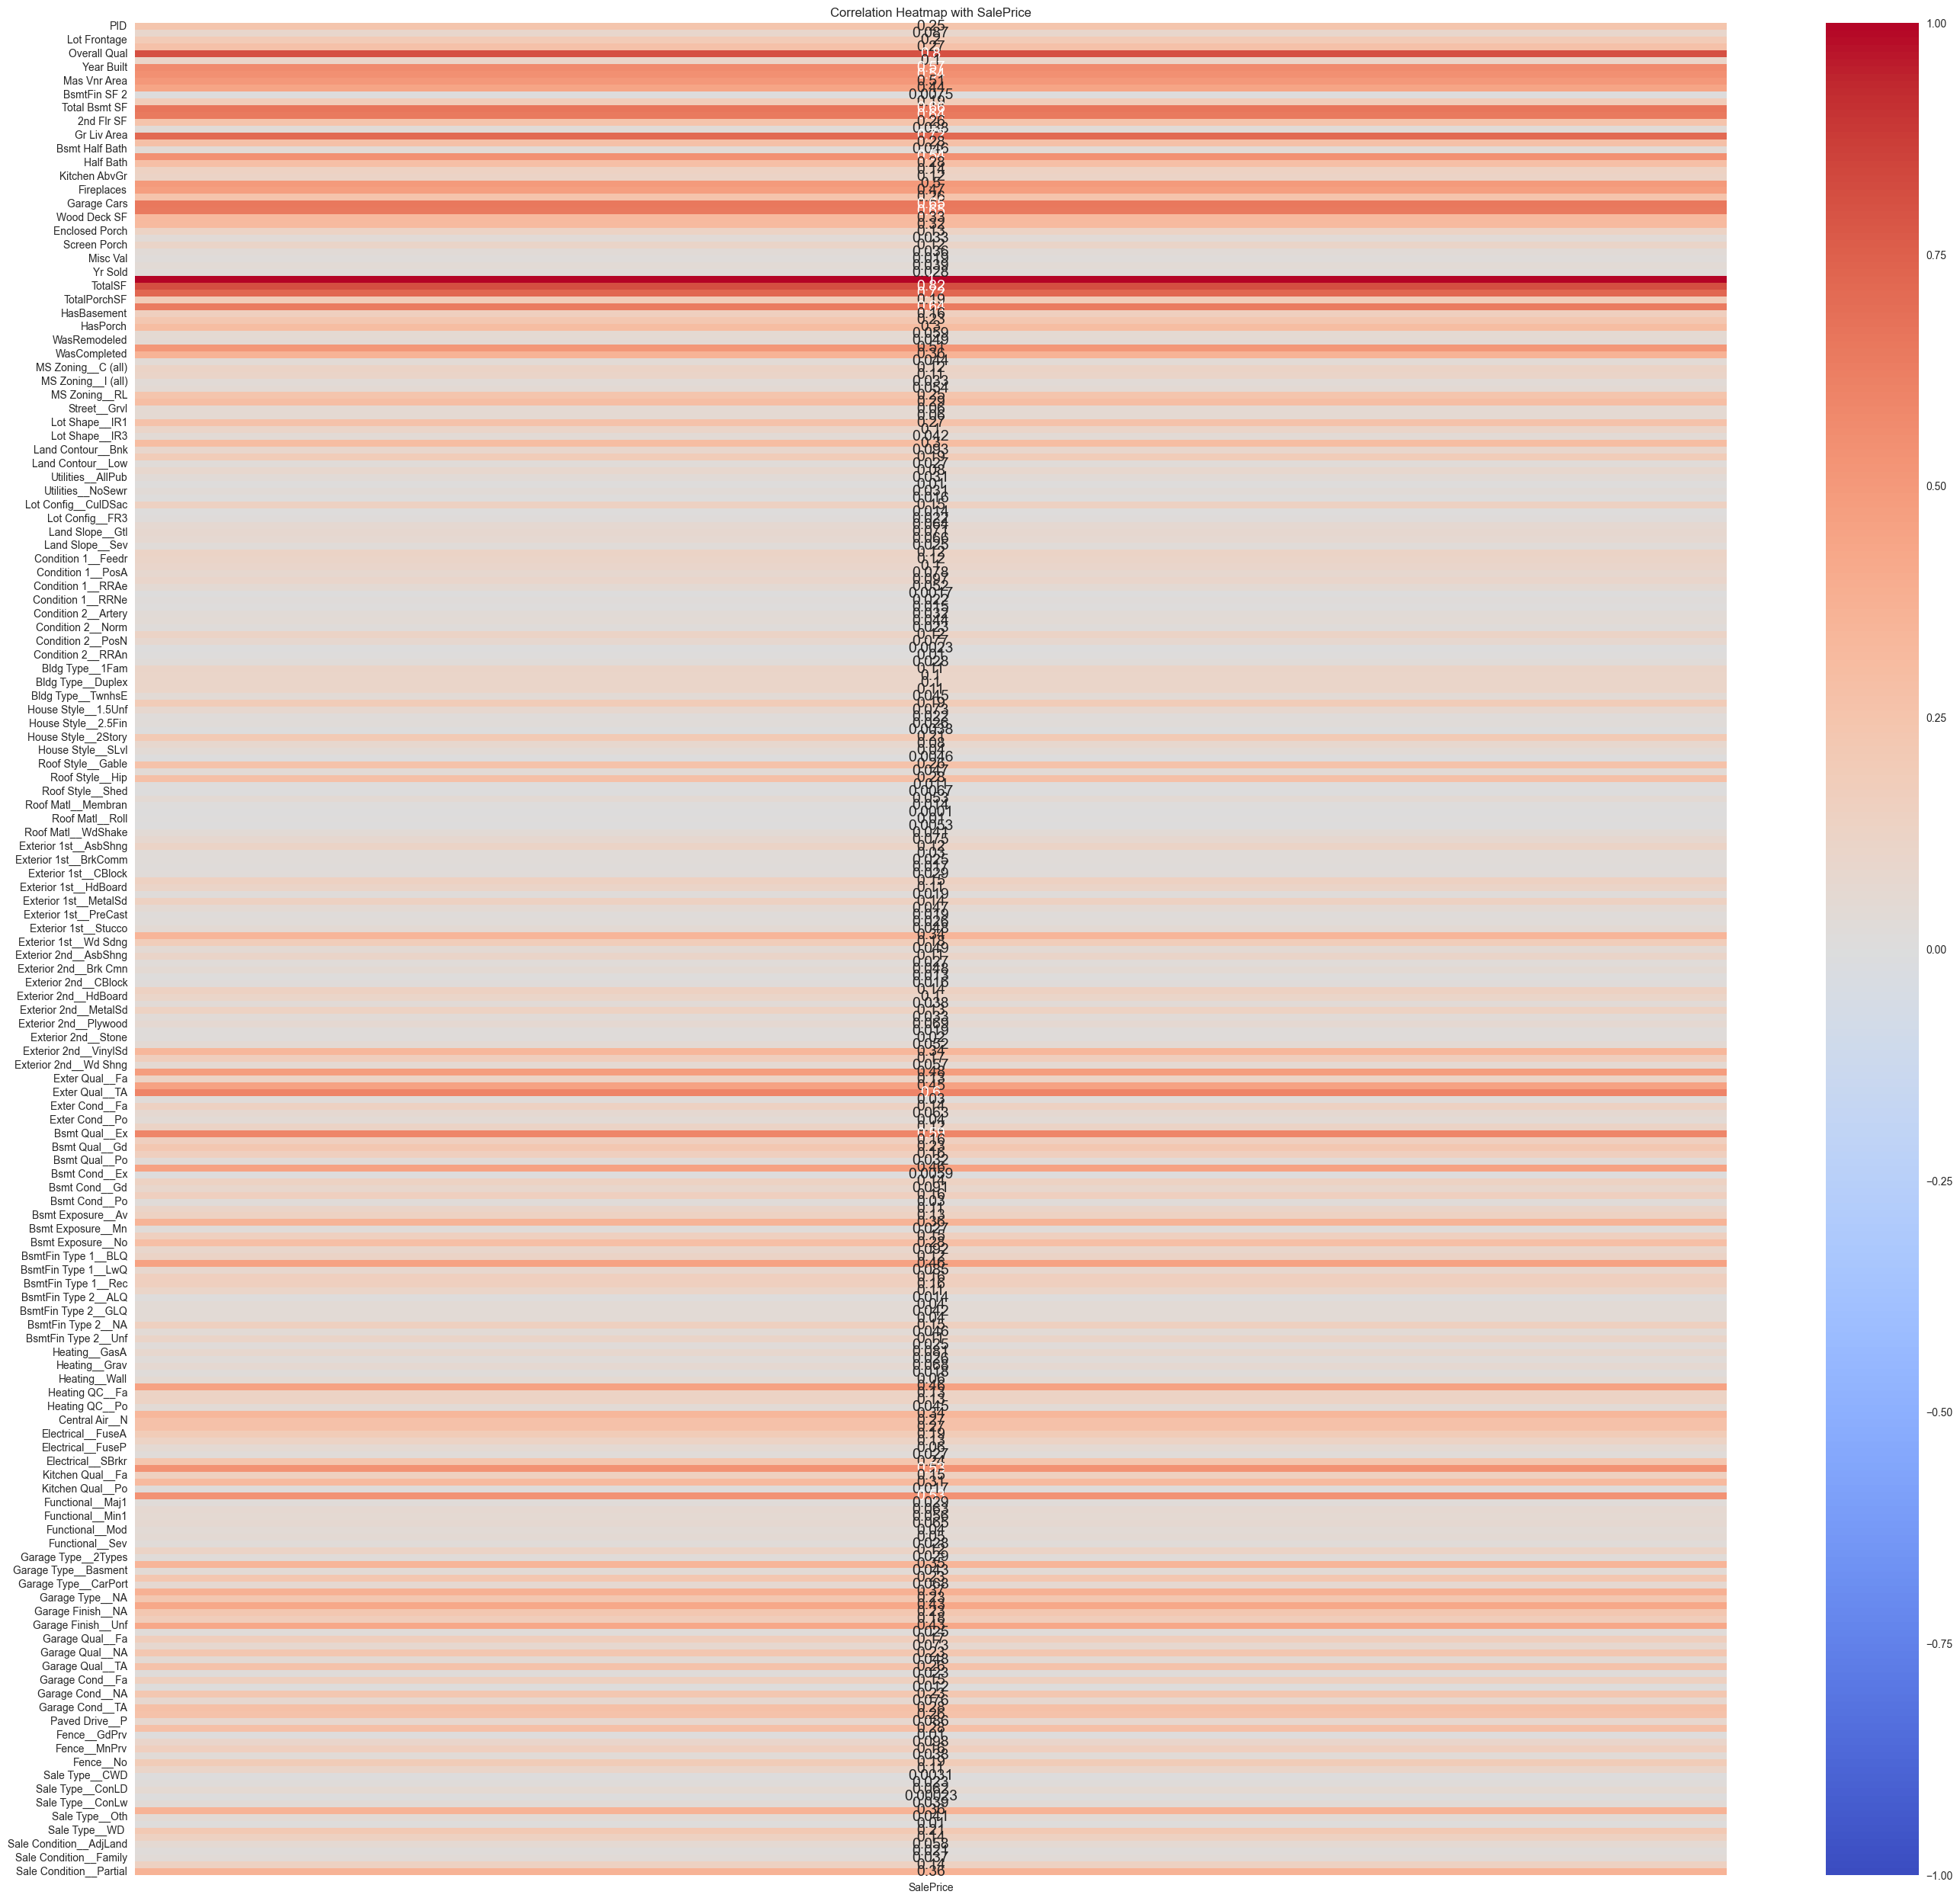

In [26]:
correlation_matrix = df_AH.corr()

correlation_with_saleprice = correlation_matrix[['SalePrice']].abs()
filtered_features = correlation_with_saleprice[correlation_with_saleprice['SalePrice'] >= 0.3].index

print(len(filtered_features))


# Plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_with_saleprice, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with SalePrice')
plt.show()

In [27]:
display(filtered_features)

df_AH = df_AH[filtered_features]
df_AH.info()

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice', 'TotalSF',
       'TotalFloorSF', 'TotalBathrooms', 'IsNew', 'WasCompleted',
       'Lot Shape__Reg', 'Exterior 1st__VinylSd', 'Exterior 2nd__VinylSd',
       'Exter Qual__Ex', 'Exter Qual__Gd', 'Exter Qual__TA', 'Bsmt Qual__Ex',
       'Bsmt Qual__TA', 'Bsmt Exposure__Gd', 'BsmtFin Type 1__GLQ',
       'Heating QC__Ex', 'Heating QC__TA', 'Kitchen Qual__Ex',
       'Kitchen Qual__Gd', 'Kitchen Qual__TA', 'Garage Type__Attchd',
       'Garage Type__Detchd', 'Garage Finish__Fin', 'Garage Finish__Unf',
       'Sale Type__New', 'Sale Condition__Partial'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 2924
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall Qual             2922 non-null   int64  
 1   Year Built               2922 non-null   int64  
 2   Year Remod/Add           2922 non-null   int64  
 3   Mas Vnr Area             2922 non-null   float64
 4   BsmtFin SF 1             2922 non-null   float64
 5   Total Bsmt SF            2922 non-null   float64
 6   1st Flr SF               2922 non-null   int64  
 7   Gr Liv Area              2922 non-null   int64  
 8   Full Bath                2922 non-null   int64  
 9   TotRms AbvGrd            2922 non-null   int64  
 10  Fireplaces               2922 non-null   int64  
 11  Garage Cars              2922 non-null   float64
 12  Garage Area              2922 non-null   float64
 13  Wood Deck SF             2922 non-null   int64  
 14  Open Porch SF            2922

In [28]:
df_AH.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,TotalSF,TotalFloorSF,TotalBathrooms,IsNew,WasCompleted,Lot Shape__Reg,Exterior 1st__VinylSd,Exterior 2nd__VinylSd,Exter Qual__Ex,Exter Qual__Gd,Exter Qual__TA,Bsmt Qual__Ex,Bsmt Qual__TA,Bsmt Exposure__Gd,BsmtFin Type 1__GLQ,Heating QC__Ex,Heating QC__TA,Kitchen Qual__Ex,Kitchen Qual__Gd,Kitchen Qual__TA,Garage Type__Attchd,Garage Type__Detchd,Garage Finish__Fin,Garage Finish__Unf,Sale Type__New,Sale Condition__Partial
0,6,1960,1960,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,528.0,210,62,215000,2736.0,1656,2.0,0,1,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True,True,False,True,False,False,False
1,5,1961,1961,0.0,468.0,882.0,896,896,1,5,0,1.0,730.0,140,0,105000,1778.0,896,1.0,0,1,True,True,True,False,False,True,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False
2,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,312.0,393,36,172000,2658.0,1329,1.5,0,1,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False
3,7,1968,1968,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,522.0,0,0,244000,4220.0,2110,3.5,0,1,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False
4,5,1997,1998,0.0,791.0,928.0,928,1629,2,6,1,2.0,482.0,212,34,189900,2557.0,1629,2.5,0,1,False,True,True,False,False,True,False,False,False,True,False,False,False,False,True,True,False,True,False,False,False


## 5. Create the train/test data and scaling (5 points)

1) Split the data into training and test set with training on 80 percent. You may use the following code 


In [29]:
X = df_AH.drop('SalePrice', axis = 1) #keep features only for X
y = df_AH['SalePrice'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


2) Standardize the data using standard scaler, then you will be building the regression models suing the scaled data.

In [30]:
#Riccardo and Chandler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## 6.  Build the Multiple Regression Model (10 points)

(a)  Build a multiple regression model using backwards elimination. To do this follow the following steps:

(1) Build initial model 

In [31]:
X_reg = X_train_scaled
y_reg = y_train

X_reg.reset_index(drop=True, inplace=True)
y_reg.reset_index(drop=True, inplace=True)

X_reg = sm.add_constant(X_reg) # adding a constant
 
initial_model = sm.OLS(y_reg, X_reg).fit()
pred = initial_model.predict(X_reg) 
 
initial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     490.5
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:28:05   Log-Likelihood:                -26991.
No. Observations:                2337   AIC:                         5.406e+04
Df Residuals:                    2297   BIC:                         5.429e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.799e+05    523.606    343.517      0.000    1.79e+05    1.81e+05
Overall Qual              1.47e+04    995.386     14.771      0.000    1.28e+04    1.67e+04
Year Built               4138.8081   1050.223      3.941      0.000    2079.323    6198.293
Year Remod/Add           3999.7133    817.553      4.892      0.000    2396.494    5602.932
Mas Vnr Area             2816.2932    626.086      4.498      0.000    1588.540    4044.047
BsmtFin SF 1             8247.1049    835.883      9.866      0.000    6607.940    9886.270
Total Bsmt SF            2873.5388   1484.872      1.935      0.053     -38.291    5785.369
1st Flr SF                973.4984    994.243      0.979      0.328    -976.210    2923.207
Gr Liv Area              9040.4416   4492.198      2.012      0.044     231.253    1.78e+04
Full Bath               -3011.9849    944.681     -3.188      0.001   -4864.501   -1159.469
TotRms AbvGrd           -3060.0473    959.984     -3.188      0.001   -4942.573   -1177.521
Fireplaces               3908.4165    639.532      6.111      0.000    2654.295    5162.538
Garage Cars               561.1435   1269.887      0.442      0.659   -1929.101    3051.388
Garage Area              5969.5644   1199.286      4.978      0.000    3617.767    8321.362
Wood Deck SF             2328.1850    576.337      4.040      0.000    1197.991    3458.379
Open Porch SF             325.8883    570.169      0.572      0.568    -792.212    1443.988
TotalSF                  7419.8374   2236.749      3.317      0.001    3033.578    1.18e+04
TotalFloorSF              1.41e+04   5893.627      2.393      0.017    2543.551    2.57e+04
TotalBathrooms            458.6170   1060.677      0.432      0.666   -1621.367    2538.601
IsNew                    -372.6207    954.255     -0.390      0.696   -2243.912    1498.671
WasCompleted             1316.6174   1728.779      0.762      0.446   -2073.514    4706.749
Lot Shape__Reg          -2241.7529    569.974     -3.933      0.000   -3359.471   -1124.035
Exterior 1st__VinylSd    -602.8469   2700.188     -0.223      0.823   -5897.908    4692.214
Exterior 2nd__VinylSd     835.5412   2668.969      0.313      0.754   -4398.301    6069.383
Exter Qual__Ex           6513.7391   1229.782      5.297      0.000    4102.139    8925.339
Exter Qual__Gd           4894.1034   2639.821      1.854      0.064    -282.579    1.01e+04
Exter Qual__TA           3075.8347   2522.898      1.219      0.223   -1871.561    8023.230
Bsmt Qual__Ex            6537.2890    718.162      9.103      0.000    5128.975    7945.603
Bsmt Qual__TA            -653.2774    775.690     -0.842      0.400   -2174.404     867.849
Bsmt Exposure__Gd        4361.7839    595.635      7.323      0.000    3193.746    5529.822
BsmtFin Type 1__GLQ       -99.7171    748.058  

(2) Review p-values

    - if a p-value is > 0.05 then eliminate the highest p-value and go to step 3
    - **if all p-values are less than 0.05 then your model is complete**

In [32]:
def view_pvals(model):
    # Print all of the pvalues for the variables
    p_values = model.pvalues[1:]
    for pred, pval in p_values.items():
        print(f"{pred}: {pval:.4f}")


In [33]:
view_pvals(initial_model)

Overall Qual: 0.0000
Year Built: 0.0001
Year Remod/Add: 0.0000
Mas Vnr Area: 0.0000
BsmtFin SF 1: 0.0000
Total Bsmt SF: 0.0531
1st Flr SF: 0.3276
Gr Liv Area: 0.0443
Full Bath: 0.0015
TotRms AbvGrd: 0.0015
Fireplaces: 0.0000
Garage Cars: 0.6586
Garage Area: 0.0000
Wood Deck SF: 0.0001
Open Porch SF: 0.5677
TotalSF: 0.0009
TotalFloorSF: 0.0168
TotalBathrooms: 0.6655
IsNew: 0.6962
WasCompleted: 0.4464
Lot Shape__Reg: 0.0001
Exterior 1st__VinylSd: 0.8234
Exterior 2nd__VinylSd: 0.7543
Exter Qual__Ex: 0.0000
Exter Qual__Gd: 0.0639
Exter Qual__TA: 0.2229
Bsmt Qual__Ex: 0.0000
Bsmt Qual__TA: 0.3998
Bsmt Exposure__Gd: 0.0000
BsmtFin Type 1__GLQ: 0.8940
Heating QC__Ex: 0.0144
Heating QC__TA: 0.0082
Kitchen Qual__Ex: 0.0000
Kitchen Qual__Gd: 0.2355
Kitchen Qual__TA: 0.6610
Garage Type__Attchd: 0.5712
Garage Type__Detchd: 0.6334
Garage Finish__Fin: 0.2182
Garage Finish__Unf: 0.7948
Sale Type__New: 0.0392
Sale Condition__Partial: 0.4464


In [34]:
def backward_elimination(X_train, y_train, significance_level=0.05):
    # Reset indices to ensure alignment to take care of index issues after scaling
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    
    # Add the constant
    X_train = sm.add_constant(X_train)

    # Fit the initial model
    ols_model = sm.OLS(y_train, X_train).fit()

    # Set the initial variable for the while loop
    max_p_value = 0.99
    iteration = 0
    excluded_features = []

    # Build the while loop under the condition that the max p-value needs to be greater than the significance level
    while max_p_value > significance_level:
        p_values = ols_model.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            max_p_value_predictor = p_values.idxmax()
            excluded_features.append(max_p_value_predictor)

            # Create a new DataFrame with the remaining features and add the constant
            X_subset = X_train.drop(columns=excluded_features)
            X_subset = sm.add_constant(X_subset)

            ols_model = sm.OLS(y_train, X_subset).fit()
            iteration += 1
            print(f"Iteration {iteration}: Max p-value = {max_p_value}, Removed feature: {max_p_value_predictor}")

    # Display the final summary
    model_summary = ols_model.summary()
    print(model_summary)

    return ols_model, excluded_features


In [35]:
trimmed_model, excluded_features = backward_elimination(X_reg, y_reg)

Iteration 1: Max p-value = 0.8939667686961106, Removed feature: BsmtFin Type 1__GLQ
Iteration 2: Max p-value = 0.8223754241899291, Removed feature: Exterior 1st__VinylSd
Iteration 3: Max p-value = 0.7896000004502663, Removed feature: Garage Finish__Unf
Iteration 4: Max p-value = 0.723905682264897, Removed feature: Exterior 2nd__VinylSd
Iteration 5: Max p-value = 0.7244917819194214, Removed feature: IsNew
Iteration 6: Max p-value = 0.7034439511275383, Removed feature: Garage Type__Detchd
Iteration 7: Max p-value = 0.7520257301049817, Removed feature: Garage Type__Attchd
Iteration 8: Max p-value = 0.6657091545136735, Removed feature: Garage Cars
Iteration 9: Max p-value = 0.655547791174754, Removed feature: Kitchen Qual__TA
Iteration 10: Max p-value = 0.6361720666932607, Removed feature: TotalBathrooms
Iteration 11: Max p-value = 0.586864022793064, Removed feature: Open Porch SF
Iteration 12: Max p-value = 0.4250504025288614, Removed feature: Sale Condition__Partial
Iteration 13: Max p-v

In [36]:
X_train_scaled.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'TotalSF',
       'TotalFloorSF', 'TotalBathrooms', 'IsNew', 'WasCompleted',
       'Lot Shape__Reg', 'Exterior 1st__VinylSd', 'Exterior 2nd__VinylSd',
       'Exter Qual__Ex', 'Exter Qual__Gd', 'Exter Qual__TA', 'Bsmt Qual__Ex',
       'Bsmt Qual__TA', 'Bsmt Exposure__Gd', 'BsmtFin Type 1__GLQ',
       'Heating QC__Ex', 'Heating QC__TA', 'Kitchen Qual__Ex',
       'Kitchen Qual__Gd', 'Kitchen Qual__TA', 'Garage Type__Attchd',
       'Garage Type__Detchd', 'Garage Finish__Fin', 'Garage Finish__Unf',
       'Sale Type__New', 'Sale Condition__Partial'],
      dtype='object')

In [37]:
results = trimmed_model.params.reset_index()
results = pd.DataFrame(results)
stat_sig_Pred = results['index'].values
display(stat_sig_Pred)
stat_sig_Pred = np.delete(stat_sig_Pred, 0)
stat_sig_Pred = stat_sig_Pred[~np.isin(stat_sig_Pred, excluded_features)]
stat_sig_Pred

array(['const', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area',
       'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Wood Deck SF', 'TotalSF', 'TotalFloorSF', 'Lot Shape__Reg',
       'Exter Qual__Ex', 'Exter Qual__Gd', 'Bsmt Qual__Ex',
       'Bsmt Exposure__Gd', 'Heating QC__Ex', 'Heating QC__TA',
       'Kitchen Qual__Ex', 'Kitchen Qual__Gd', 'Sale Type__New'],
      dtype=object)

array(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Wood Deck SF',
       'TotalSF', 'TotalFloorSF', 'Lot Shape__Reg', 'Exter Qual__Ex',
       'Exter Qual__Gd', 'Bsmt Qual__Ex', 'Bsmt Exposure__Gd',
       'Heating QC__Ex', 'Heating QC__TA', 'Kitchen Qual__Ex',
       'Kitchen Qual__Gd', 'Sale Type__New'], dtype=object)

In [38]:
print(len(stat_sig_Pred))

24


(3) Build a new model without eliminated independent variable

In [39]:
trimmed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     834.7
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:28:05   Log-Likelihood:                -26994.
No. Observations:                2337   AIC:                         5.404e+04
Df Residuals:                    2313   BIC:                         5.417e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.799e+05    522.580    344.191      0.000    1.79e+05    1.81e+05
Overall Qual       1.471e+04    952.804     15.442      0.000    1.28e+04    1.66e+04
Year Built         4624.8051    844.478      5.477      0.000    2968.792    6280.818
Year Remod/Add     4168.6649    796.159      5.236      0.000    2607.405    5729.925
Mas Vnr Area       2771.5020    618.909      4.478      0.000    1557.827    3985.177
BsmtFin SF 1       8447.0052    659.869     12.801      0.000    7153.009    9741.001
Total Bsmt SF      3148.1958   1371.230      2.296      0.022     459.228    5837.163
Gr Liv Area        8839.1385   4464.091      1.980      0.048      85.100    1.76e+04
Full Bath         -2642.4325    779.066     -3.392      0.001   -4170.173   -1114.692
TotRms AbvGrd     -3121.5320    936.234     -3.334      0.001   -4957.477   -1285.587
Fireplaces         4076.5091    621.604      6.558      0.000    2857.549    5295.469
Garage Area        6371.1053    695.153      9.165      0.000    5007.917    7734.294
Wood Deck SF       2385.5655    566.360      4.212      0.000    1274.939    3496.192
TotalSF            7441.5116   2209.196      3.368      0.001    3109.301    1.18e+04
TotalFloorSF       1.499e+04   5845.793      2.565      0.010    3528.355    2.65e+04
Lot Shape__Reg    -2322.6706    558.730     -4.157      0.000   -3418.334   -1227.007
Exter Qual__Ex     5409.6713    762.904      7.091      0.000    3913.625    6905.718
Exter Qual__Gd     1986.9244    883.796      2.248      0.025     253.809    3720.040
Bsmt Qual__Ex      6668.6784    703.046      9.485      0.000    5290.013    8047.344
Bsmt Exposure__Gd  4506.6127    581.120      7.755      0.000    3367.041    5646.184
Heating QC__Ex     1904.9560    778.148      2.448      0.014     379.016    3430.896
Heating QC__TA    -1932.5660    703.847     -2.746      0.006   -3312.804    -552.328
Kitchen Qual__Ex   7066.0444    798.036      8.854      0.000    5501.103    8630.985
Kitchen Qual__Gd   2998.2467    819.775      3.657      0.000    1390.676    4605.817
Sale Type__New     4564.1301    600.710      7.598      0.000    3386.144    5742.116
==============================================================================
Omnibus:                      379.883   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3848.806
Skew:                           0.441   Prob(JB):                         0.00
Kurtosis:                       9.225   Cond. No.                     1.55e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.85e-29. This might indicate that there are
strong multicollinearity 

(4) Go back to step 2

In [40]:
view_pvals(trimmed_model)

Overall Qual: 0.0000
Year Built: 0.0000
Year Remod/Add: 0.0000
Mas Vnr Area: 0.0000
BsmtFin SF 1: 0.0000
Total Bsmt SF: 0.0218
Gr Liv Area: 0.0478
Full Bath: 0.0007
TotRms AbvGrd: 0.0009
Fireplaces: 0.0000
Garage Area: 0.0000
Wood Deck SF: 0.0000
TotalSF: 0.0008
TotalFloorSF: 0.0104
Lot Shape__Reg: 0.0000
Exter Qual__Ex: 0.0000
Exter Qual__Gd: 0.0247
Bsmt Qual__Ex: 0.0000
Bsmt Exposure__Gd: 0.0000
Heating QC__Ex: 0.0144
Heating QC__TA: 0.0061
Kitchen Qual__Ex: 0.0000
Kitchen Qual__Gd: 0.0003
Sale Type__New: 0.0000


(b) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.

In [41]:
coefficients = trimmed_model.params
intercept = coefficients[0]

predictors = coefficients.index[1:]  # Exclude the intercept
coef_values = coefficients.values[1:]

regression_equation = f"SalePrice = {intercept:.4f}\n"
for pred, coef in zip(predictors, coef_values):
    regression_equation += f" + ({coef:.4f} * {pred})\n"

# Print the final equation
print(regression_equation)

SalePrice = 179867.2122
 + (14713.6645 * Overall Qual)
 + (4624.8051 * Year Built)
 + (4168.6649 * Year Remod/Add)
 + (2771.5020 * Mas Vnr Area)
 + (8447.0052 * BsmtFin SF 1)
 + (3148.1958 * Total Bsmt SF)
 + (8839.1385 * Gr Liv Area)
 + (-2642.4325 * Full Bath)
 + (-3121.5320 * TotRms AbvGrd)
 + (4076.5091 * Fireplaces)
 + (6371.1053 * Garage Area)
 + (2385.5655 * Wood Deck SF)
 + (7441.5116 * TotalSF)
 + (14991.8982 * TotalFloorSF)
 + (-2322.6706 * Lot Shape__Reg)
 + (5409.6713 * Exter Qual__Ex)
 + (1986.9244 * Exter Qual__Gd)
 + (6668.6784 * Bsmt Qual__Ex)
 + (4506.6127 * Bsmt Exposure__Gd)
 + (1904.9560 * Heating QC__Ex)
 + (-1932.5660 * Heating QC__TA)
 + (7066.0444 * Kitchen Qual__Ex)
 + (2998.2467 * Kitchen Qual__Gd)
 + (4564.1301 * Sale Type__New)




(5) As we used the validation set approach here, predict the y values in the test data and report the following measures of accuracy.

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
Please interpret these values.

Note: To keep the readability of Jupyter notebook, please include the initial model and the final model for the multiple regression using backward elimination.

In [42]:
trimmed_cols = stat_sig_Pred
print(trimmed_cols)

['Overall Qual' 'Year Built' 'Year Remod/Add' 'Mas Vnr Area'
 'BsmtFin SF 1' 'Total Bsmt SF' 'Gr Liv Area' 'Full Bath' 'TotRms AbvGrd'
 'Fireplaces' 'Garage Area' 'Wood Deck SF' 'TotalSF' 'TotalFloorSF'
 'Lot Shape__Reg' 'Exter Qual__Ex' 'Exter Qual__Gd' 'Bsmt Qual__Ex'
 'Bsmt Exposure__Gd' 'Heating QC__Ex' 'Heating QC__TA' 'Kitchen Qual__Ex'
 'Kitchen Qual__Gd' 'Sale Type__New']


In [43]:
X_test_trimmed = X_test[trimmed_cols]
X_test_trimmed = sm.add_constant(X_test_trimmed)

y_hat_test_trimmed = trimmed_model.predict(X_test_trimmed)

In [44]:
print(len(trimmed_cols))

24


In [45]:
test_mse = mean_squared_error(y_test, y_hat_test_trimmed)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test_trimmed)
test_r_squared = r2_score(y_test, y_hat_test_trimmed)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test_trimmed)

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test MAE is:\t{round(test_mae, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')
# print(f' the train MAPE is:\t{round (train_mape, 4)}')

The test RMSE is:	85429740.964
The test MAE is:	82748882.381
The test Rsquared is:	-995532.5418
The test MAPE is:	495.9814


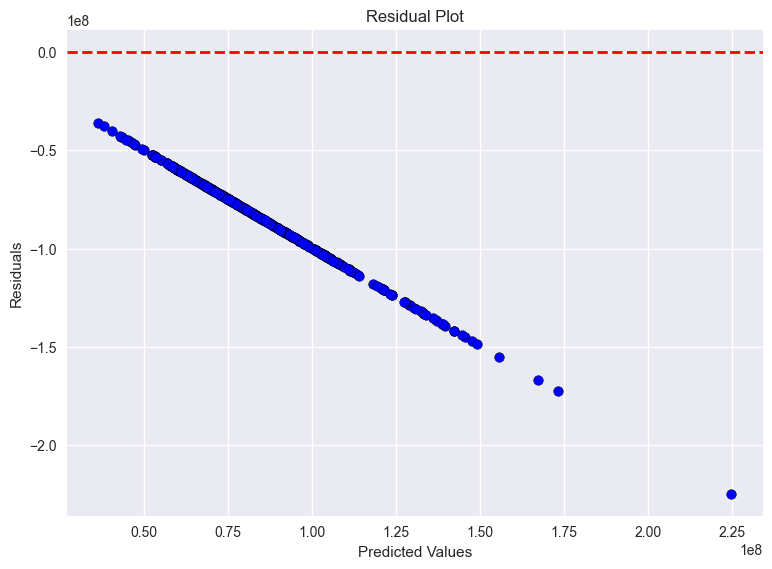

In [46]:
# Calculate residuals
residuals = y_test - y_hat_test_trimmed

# Residual plot: residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_hat_test_trimmed, residuals, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0 for reference
plt.xlabel('Predicted Values')  # X-axis: Predicted values from the model
plt.ylabel('Residuals')  # Y-axis: Difference between actual and predicted values
plt.title('Residual Plot')  # Title of the plot
plt.show()

## 7. Build the LASSO Regression Model(10 points)

(a)  Build a LASSO regression model using all the variables that you used initially in your multiple linear regression model. You are advised to use the grid search CV(5 fold) on training data to find the best value of lambda. Then report the following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?


In [47]:
#Riccardo
alpha_values = np.arange(0, 1000, 3)

cv = RepeatedKFold(n_splits=5, random_state=42)

lasso_model = Lasso()

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

Best alpha value: 198


In [48]:
#Riccardo
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_best.predict(X_test_scaled)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred)
lasso_mape = mean_absolute_percentage_error(y_test, y_pred_lasso)


print(f"RMSE: {lasso_rmse:.4f}")
print(f"MAPE: {lasso_mape:.4f}")
print(f"R2: {lasso_r2:.4f}")

NameError: name 'y_pred' is not defined

(b) Identify the variables with the non zero regression coefficients. Are they the same as the one that is statistically insignificant in multiple linear regression model?

In [ ]:
#Riccardo
lasso_coefficients = pd.Series(lasso_best.coef_, index=X.columns)
non_zero_coefficients = lasso_coefficients[lasso_coefficients != 0]

print("Variables with Non-Zero Coefficients in LASSO Regression:")
print(non_zero_coefficients)

Variables with Non-Zero Coefficients in LASSO Regression:
Overall Qual          15031.218338
Year Built             4056.212810
Year Remod/Add         4117.349224
Mas Vnr Area           2752.329079
BsmtFin SF 1           8413.353038
1st Flr SF              706.854311
Gr Liv Area            4120.240861
Full Bath             -2080.767247
TotRms AbvGrd         -2087.074123
Fireplaces             3934.430611
Garage Cars             436.406213
Garage Area            6069.328560
Wood Deck SF           2317.372263
Open Porch SF           231.960338
TotalSF               12894.825249
TotalFloorSF          14485.836921
Lot Shape__Reg        -2137.608124
Exter Qual__Ex         5156.783809
Exter Qual__Gd         1696.563396
Bsmt Qual__Ex          6501.183595
Bsmt Qual__TA          -563.970167
Bsmt Exposure__Gd      4317.644483
Heating QC__Ex         1978.777547
Heating QC__TA        -1716.861600
Kitchen Qual__Ex       6136.655386
Kitchen Qual__Gd       1261.375407
Kitchen Qual__TA      -1667.7592

(c) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.

In [ ]:
#Riccardo
intercept = lasso_best.intercept_
equation = "SalePrice = {:.4f}".format(intercept)  # Intercept

for var, coef in non_zero_coefficients.items():
    equation += " + {:.4f} * {}".format(coef, var)

print("LASSO Regression Equation:")
print(equation)

LASSO Regression Equation:
SalePrice = 179867.2122 + 15031.2183 * Overall Qual + 4056.2128 * Year Built + 4117.3492 * Year Remod/Add + 2752.3291 * Mas Vnr Area + 8413.3530 * BsmtFin SF 1 + 706.8543 * 1st Flr SF + 4120.2409 * Gr Liv Area + -2080.7672 * Full Bath + -2087.0741 * TotRms AbvGrd + 3934.4306 * Fireplaces + 436.4062 * Garage Cars + 6069.3286 * Garage Area + 2317.3723 * Wood Deck SF + 231.9603 * Open Porch SF + 12894.8252 * TotalSF + 14485.8369 * TotalFloorSF + -2137.6081 * Lot Shape__Reg + 5156.7838 * Exter Qual__Ex + 1696.5634 * Exter Qual__Gd + 6501.1836 * Bsmt Qual__Ex + -563.9702 * Bsmt Qual__TA + 4317.6445 * Bsmt Exposure__Gd + 1978.7775 * Heating QC__Ex + -1716.8616 * Heating QC__TA + 6136.6554 * Kitchen Qual__Ex + 1261.3754 * Kitchen Qual__Gd + -1667.7593 * Kitchen Qual__TA + 707.0956 * Garage Finish__Fin + 4329.5328 * Sale Type__New


## 8. Build the Ridge Regression Model(10 points)

(a)  Build the Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best lambda obtained by grid search CV(5 fold)  on the training data. 
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values? 

In [ ]:
#Riccardo
ridge = Ridge()

alpha_values = np.arange(0, 1000, 3)

param_grid = {'alpha': alpha_values}

cv = RepeatedKFold(n_splits=5, random_state=42)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best alpha value: {best_alpha}")
print(f"Best score (neg mean squared error): {best_score}")

c:\Users\chand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.56909e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\chand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.41401e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\chand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.28119e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\chand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.30587e-18): result may not be accurate.
  return linalg.solve

Best alpha value: 63
Best score (neg mean squared error): -661316914.4118634


In [ ]:
#Riccardo
ridge_best = Ridge(alpha=best_alpha)

ridge_best.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_best.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mape = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f"RMSE: {ridge_rmse}")
print(f"R2: {ridge_r2}")
print(f"MAPE: {ridge_mape}")

RMSE: 31344.71237228264
R2: 0.865981023805323
MAPE: 0.10238945628809938


(b) Identify the regression coefficients of all variables. What is the difference you noticed between the Lasso and the Ridge regression coefficients?


In [ ]:
# Riccardo
ridge_coefficients = pd.Series(ridge_best.coef_, index=X.columns)
coeff_comparison = pd.DataFrame({'LASSO': lasso_coefficients, 'Ridge': ridge_coefficients})
print("Comparison of LASSO and Ridge Coefficients:")
print(coeff_comparison)

Comparison of LASSO and Ridge Coefficients:
                                LASSO         Ridge
Overall Qual             15031.218338  14142.660714
Year Built                4056.212810   3834.164052
Year Remod/Add            4117.349224   4045.599687
Mas Vnr Area              2752.329079   2987.755948
BsmtFin SF 1              8413.353038   7821.333753
Total Bsmt SF                0.000000   2651.600286
1st Flr SF                 706.854311   1279.786755
Gr Liv Area               4120.240861  10196.929659
Full Bath                -2080.767247  -2768.876883
TotRms AbvGrd            -2087.074123  -2215.412272
Fireplaces                3934.430611   4026.497856
Garage Cars                436.406213   1209.172000
Garage Area               6069.328560   5569.381677
Wood Deck SF              2317.372263   2424.724137
Open Porch SF              231.960338    470.339532
TotalSF                  12894.825249   8043.657174
TotalFloorSF             14485.836921  11076.749311
TotalBathrooms      

(c) Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable. Note: Since the value of coefficient may be very small, you may round the coefficient to two decimal places and use the non zero coefficients.

In [ ]:
#Riccardo
intercept = round(ridge_best.intercept_, 2)  # Round intercept
equation = f"SalePrice = {intercept}"

for var, coef in ridge_coefficients.items():
    equation += f" + ({coef}) * {var}"

print("Ridge Regression Equation:")
print(equation)

Ridge Regression Equation:
SalePrice = 179867.21 + (14142.660713573792) * Overall Qual + (3834.164051793112) * Year Built + (4045.599687050746) * Year Remod/Add + (2987.7559479847305) * Mas Vnr Area + (7821.333753448723) * BsmtFin SF 1 + (2651.6002857005515) * Total Bsmt SF + (1279.7867550008184) * 1st Flr SF + (10196.929658785057) * Gr Liv Area + (-2768.876883123023) * Full Bath + (-2215.412272416189) * TotRms AbvGrd + (4026.4978557832505) * Fireplaces + (1209.1719995243936) * Garage Cars + (5569.381676544236) * Garage Area + (2424.724137054018) * Wood Deck SF + (470.3395323219501) * Open Porch SF + (8043.657173776127) * TotalSF + (11076.749310995645) * TotalFloorSF + (831.1057577695211) * TotalBathrooms + (-238.65867893353658) * IsNew + (-509.87502246146914) * WasCompleted + (-2248.9046008568716) * Lot Shape__Reg + (-228.05814771784287) * Exterior 1st__VinylSd + (364.07639618069805) * Exterior 2nd__VinylSd + (5553.592905496785) * Exter Qual__Ex + (2452.587248146856) * Exter Qual__Gd 

## 9. Build the Kernel Ridge Regression Model(10 points)

https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

(a)  Build the Kernel Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best values of tuning parameters obtained by grid search CV(5 fold)  on the training data. 
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?


In [ ]:
# Riccardo
kr = KernelRidge()

param_grid = {
    'alpha': np.logspace(-4, 1, 20),
    'kernel': ['poly', 'rbf',], 
    'degree': [2, 3], 
    'gamma': np.logspace(-4, 1, 20)
}

grid_search = GridSearchCV(kr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters from GridSearchCV:", best_params)

In [ ]:
# Riccardo
kr_best = KernelRidge(**best_params)
kr_best.fit(X_train_scaled, y_train)

In [ ]:
#Riccardo
y_pred_kernel = kr_best.predict(X_test_scaled)

kernel_rmse = np.sqrt(mean_squared_error(y_test, y_pred_kernel))
kernel_mape = mean_absolute_percentage_error(y_test, y_pred_kernel)
kernel_r2 = r2_score(y_test, y_pred_kernel)

print(f'RMSE: {kernel_rmse}')
print(f'MAPE: {kernel_mape}')
print(f'R2: {kernel_r2}')

(b) By conducting the error analysis, what is the difference you noticed with the previous models?

(c)  Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable, if possible.

In [ ]:
#Riccardo
if best_params['kernel'] == 'linear':
    coefficients = pd.Series(kr_best.coef_, index=X.columns)
    intercept = kr_best.intercept_
    equation = f"SalePrice = {intercept} + " + " + ".join([f"({coef}) * {var}" for var, coef in coefficients.items()])
    print("Kernel Ridge Regression Equation:", equation)

## 10. Model Comparison and Conclusion (20 points)

 (a) Create the visualizations of the residuals from the multiple regression, LASSO regression, Ridge regression and Kernel Ridge regression. You can create several visuals that are useful to gain insights on the residuals of each models separately or together. Explain what you observe from these graphs.

In [ ]:
residuals_lasso = y_test - y_pred_lasso
residuals_ridge = y_test - y_pred_ridge
residuals_kr = y_test - y_pred_kernel

plt.figure(figsize=(18, 6))

# LASSO Residual Plot
plt.subplot(1, 3, 1)
plt.scatter(y_pred_lasso, residuals_lasso, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('LASSO Residual Plot')

# Ridge Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred_ridge, residuals_ridge, color='green', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Residual Plot')

# Kernel Ridge Residual Plot
plt.subplot(1, 3, 3)
plt.scatter(y_pred_kr, residuals_kr, color='purple', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Kernel Ridge Residual Plot')

plt.tight_layout()
plt.show()

(b) Study the performance scores obtained from all three models and explain which model the company need to choose for deployment and why? Provide the support for your resoning/decision with the appropriate graphs and tables with a clear explanation.